In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/')

In [ ]:
# %cd ..

In [ ]:
%cd covid-chestxray-dataset/Covid/

/content/drive/My Drive/covid-chestxray-dataset/Covid


In [ ]:
# os.listdir()
# %ls

In [ ]:
# %cd Train/

In [ ]:
# len(os.listdir('NORMAL'))

In [ ]:
# !cp -r PNEUMONIA /content/drive/My\ Drive/covid-chestxray-dataset/Covid/Test

In [ ]:
# for i in range()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3,ResNet101,VGG19, ResNet50
# from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential,load_model
import numpy as np

In [ ]:
from glob import glob

In [ ]:
folders = glob('/content/drive/My Drive/covid-chestxray-dataset/Covid/Train/*')

In [ ]:
folders

['/content/drive/My Drive/covid-chestxray-dataset/Covid/Train/NORMAL',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Train/PNEUMONIA',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Train/Covid-19']

In [ ]:
imagesize = [224,224]

In [ ]:
resnet = ResNet101(input_shape=imagesize + [3],weights='imagenet',include_top=False)

In [ ]:
for l in resnet.layers:
  l.trainable = False

In [ ]:
# resnet.layers

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
# x1 = Dense(20,activation='relu')(x)
prediction = Dense(3,activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid-chestxray-dataset/Covid/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')
validation_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid-chestxray-dataset/Covid/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 4398 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.


In [ ]:
# ACCURACY_THRESHOLD = 0.95
# class myCallback(tf.keras.callbacks.Callback): 
#     def on_epoch_end(self, epoch, logs={}): 
#         if(logs.get('acc') > ACCURACY_THRESHOLD):   
#           print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
#           # self.model.stop_training = True

In [ ]:
# callbacks = myCallback()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten,Conv2D,Maxpooling2D
# model = Sequential()
# model.add(Conv2D(150,(3,3), input_shape=(224,224),activation='relu'))
# model.add(Maxpooling2D((2,2)))

# model.add(Conv2d(128,activation = 'relu'))
# model.add(Maxpooling2D(2))

# model.add(Flatten())

# model.add(Dense(20,activation = 'relu'))
# model.add(Dense(4,activation = 'softmax'))


In [ ]:
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=9,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/9
138/138 [==============================] - 1544s 11s/step - loss: 0.6663 - accuracy: 0.7983 - val_loss: 0.2951 - val_accuracy: 0.8879
Epoch 2/9
138/138 [==============================] - 79s 576ms/step - loss: 0.3234 - accuracy: 0.8749 - val_loss: 0.4402 - val_accuracy: 0.8286
Epoch 3/9
138/138 [==============================] - 78s 564ms/step - loss: 0.2840 - accuracy: 0.8963 - val_loss: 0.3102 - val_accuracy: 0.8788
Epoch 4/9
138/138 [==============================] - 78s 562ms/step - loss: 0.2950 - accuracy: 0.8874 - val_loss: 0.1713 - val_accuracy: 0.9335
Epoch 5/9
138/138 [==============================] - 77s 557ms/step - loss: 0.1943 - accuracy: 0.9277 - val_loss: 0.4407 - val_accuracy: 0.8405
Epoch 6/9
138/138 [==============================] - 77s 561ms/step - loss: 0.2113 - accuracy: 0.9254 - val_loss: 0.3374 - val_accuracy: 0.8769
Epoch 7/9
138/138 [==============================] - 76s 549ms/step - loss: 0.1763 - accuracy: 0.9334 - val_loss: 0.2122 - val_accuracy:

In [ ]:
# r.history

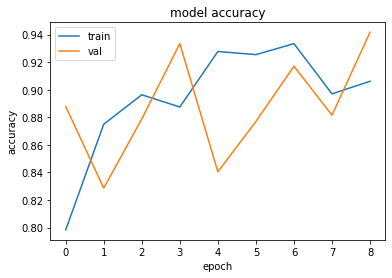

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

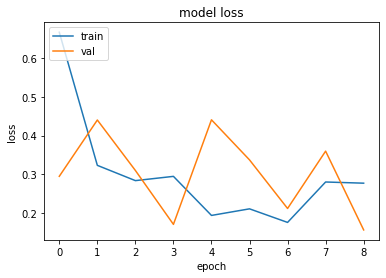

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('covid_pneumonia.h5')

In [ ]:
testgen = ImageDataGenerator(rescale = 1./255)

In [ ]:
testset = testgen.flow_from_directory('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')

Found 481 images belonging to 3 classes.


In [ ]:
model.evaluate(testset)

16/16 [==============================] - 164s 10s/step - loss: 0.2754 - accuracy: 0.9148


[0.27544891834259033, 0.9147608876228333]

In [ ]:
testset.filepaths

['/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-12.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-17.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-19.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-2.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-24.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-27.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-3.png',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-6.png',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-9-a.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001-9-b.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/000001.jpg',
 '/content/drive/My Drive/covid-chestxray-dataset/Covid/Te

In [ ]:
training_set.class_indices

{'Covid-19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
y_pred = model.predict(testset)

In [ ]:
y_pred

array([[1.0292593e-07, 9.9999249e-01, 7.4019131e-06],
       [1.0094628e-07, 9.5154135e-04, 9.9904829e-01],
       [2.4154367e-08, 4.2755861e-02, 9.5724416e-01],
       ...,
       [3.3192921e-07, 3.6070980e-03, 9.9639255e-01],
       [3.0246434e-05, 9.9959713e-01, 3.7263159e-04],
       [3.7418797e-03, 5.7009898e-02, 9.3924820e-01]], dtype=float32)

In [ ]:
ypred = np.argmax(y_pred, axis = 1)

In [ ]:
testset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
ypred

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0,

In [ ]:
np.unique(ypred)

array([0, 1, 2])

In [ ]:
import tensorflow as tf

In [ ]:
tf.math.confusion_matrix(testset.labels,ypred)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  6,   8,  53],
       [  9,  30,  69],
       [ 37,  72, 197]], dtype=int32)>

In [ ]:
true_classes = testset.classes
class_labels = list(testset.class_indices.keys())  

In [ ]:
true_classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_true=true_classes, y_pred = ypred)

0.48440748440748443

In [ ]:
report = classification_report(true_classes, ypred, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

    Covid-19       0.11      0.09      0.10       693
      NORMAL       0.24      0.27      0.25      1233
   PNEUMONIA       0.65      0.63      0.64      3569

    accuracy                           0.48      5495
   macro avg       0.33      0.33      0.33      5495
weighted avg       0.49      0.48      0.48      5495



In [ ]:
import os
imglst = os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tqdm import tqdm
test = []
real_label = []

In [ ]:
testset.class_indices

{'Covid-19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
import numpy as np
for i in tqdm(range(len(os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA')))):
    img = image.load_img('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA/{}'.format(imglst[i]),target_size=(224,224))
    img = image.img_to_array(img)
    img = img/255
    img = np.array(img)
    real_label.append(2)
    test.append(img)

100%|██████████| 306/306 [00:02<00:00, 136.69it/s]


In [ ]:
test = np.array(test)

In [ ]:
# real_label

In [ ]:
pred = model.predict(test)

In [ ]:
pred = np.argmax(pred,axis=1)

In [ ]:
pred

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
accuracy_score(y_true=real_label,y_pred= pred)

0.9147609147609148

In [ ]:
confussion

In [ ]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [ ]:
model.save('covid_resnet101.h5')

In [ ]:
model = load_model('covid_resnet101.h5')

In [ ]:
# model.summary()

In [ ]:
test = []
real_label = []

In [ ]:
import numpy as np
import os
from tqdm import tqdm


In [ ]:
imglst = os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19')
import numpy as np
for i in tqdm(range(len(os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19')))):
    img = image.load_img('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/Covid-19/{}'.format(imglst[i]),target_size=(224,224))
    img = image.img_to_array(img)
    img = img/255
    img = np.array(img)
    real_label.append(0)
    test.append(img)

100%|██████████| 67/67 [00:22<00:00,  2.96it/s]


In [ ]:
imglst = os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/NORMAL')
for i in tqdm(range(len(os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/NORMAL')))):
    img = image.load_img('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/NORMAL/{}'.format(imglst[i]),target_size=(224,224))
    img = image.img_to_array(img)
    img = img/255
    img = np.array(img)
    real_label.append(1)
    test.append(img)

100%|██████████| 108/108 [00:29<00:00,  3.64it/s]


In [ ]:
imglst = os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA')
for i in tqdm(range(len(os.listdir('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA')))):
    img = image.load_img('/content/drive/My Drive/covid-chestxray-dataset/Covid/Test/PNEUMONIA/{}'.format(imglst[i]),target_size=(224,224))
    img = image.img_to_array(img)
    img = img/255
    img = np.array(img)
    real_label.append(2)
    test.append(img)

100%|██████████| 306/306 [01:22<00:00,  3.71it/s]


In [ ]:
test = np.array(test)

In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
acc_scr = accuracy_score(y_true=real_label, y_pred=y_pred)

In [ ]:
acc_scr

0.9147609147609148

In [ ]:
confusion_mat = confusion_matrix(y_true=real_label, y_pred=y_pred)

In [ ]:
confusion_mat

array([[ 51,   6,  10],
       [  0,  94,  14],
       [  1,  10, 295]])

In [ ]:
cn_mat = np.array(confusion_mat)
cn_mat

array([[ 51,   6,  10],
       [  0,  94,  14],
       [  1,  10, 295]])

In [ ]:
np.savetxt("foo.csv", cn_mat, delimiter=",")

In [ ]:
import pandas as pd
df = pd.read_csv('foo.csv',header=None)

In [ ]:
df.columns = ['Covid-19', 'Normal', 'Pneumonia']

In [ ]:
df = df.T

In [ ]:
df.columns = ['Covid-19', 'Normal', 'Pneumonia']
df = df.T
df

,Covid-19,Normal,Pneumonia
Covid-19,51.0,6.0,10.0
Normal,0.0,94.0,14.0
Pneumonia,1.0,10.0,295.0


In [ ]:
df.to_csv('confussion_mat.csv')

In [ ]:
%ls

'Classification report.csv'   confussion_mat.csv   foo.csv


In [ ]:
%cd covid_results/

/content/drive/My Drive/covid_results


In [ ]:
dict_mat = classification_report(y_true=real_label, y_pred=y_pred, output_dict=True)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(dict_mat).T

In [ ]:
df 

,precision,recall,f1-score,support
0,0.980769,0.761194,0.857143,67.000000
1,0.854545,0.870370,0.862385,108.000000
2,0.924765,0.964052,0.944000,306.000000
accuracy,0.914761,0.914761,0.914761,0.914761
macro avg,0.920027,0.865206,0.887843,481.000000
weighted avg,0.916799,0.914761,0.913576,481.000000


In [ ]:
%mkdir covid_results

In [ ]:
%cd covid_results/

/content/drive/My Drive/covid_results


In [ ]:
df.to_csv('Classification report.csv')

In [ ]:
%ls

sample_data/


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
yPredict = model.predict(test,verbose=1)

16/16 [==============================] - 1s 86ms/step


In [ ]:
auc = roc_auc_score(real_label, yPredict)
print('AUC: %.2f' % auc)

ValueError: ignored

In [ ]:
fpr, tpr, thresholds = roc_curve(np.array(real_label), np.array(yPredict))

ValueError: ignored

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(real_label[:, i], yPredict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

TypeError: ignored

In [ ]:
roc_auc_ovo = roc_auc_score(real_label, yPredict, multi_class="ovr",average="macro")

In [ ]:
roc_auc_ovo

0.9815103626527777

In [ ]:
fpr, tpr,_ = roc_curve(real_label, yPredict)

ValueError: ignored